Кол-во строк в файле: 2128
Кол-во слов: 45078
Кол-во символов (без пробелов): 241149
Кол-во символов (включая пробелы): 286226


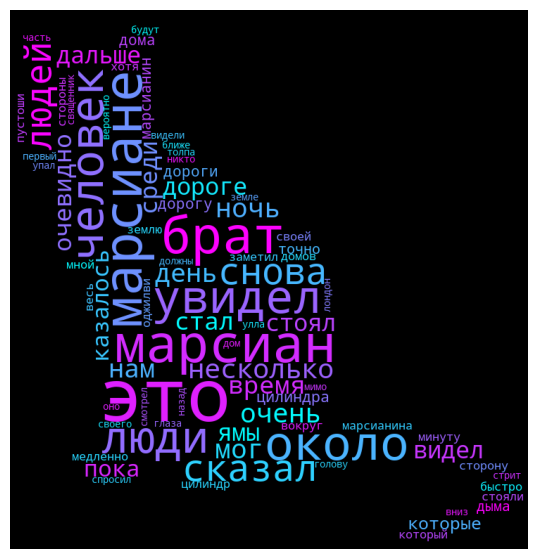

In [61]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt

tokenizer = RegexpTokenizer(r'\w+')
stopwrds = set(stopwords.words('russian'))

with open('Уэллс_-_Война_миров.txt', 'r') as file:
    data = file.readlines()

data = np.array(data)
words = tokenizer.tokenize(''.join(data).lower())
print(f'Кол-во строк в файле: {data.size}')
print(f'Кол-во слов: {len(words)}')
print(f'Кол-во символов (без пробелов): {len("".join(words))}')
print(f'Кол-во символов (включая пробелы): {len(" ".join(words))}')

filtered_words = [w for w in words if w not in stopwrds]
words_series = pd.Series(filtered_words)
words_dict = dict(words_series.value_counts()[:80])

mask = np.array(Image.open('mask.jpg'))
wordcloud = WordCloud(width = 1500,
                        height = 900,
                        background_color = 'black',
                        min_font_size = 3,
                        colormap ='cool', mask = mask)

wordcloud.generate_from_frequencies(frequencies = words_dict)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()